<a href="https://colab.research.google.com/github/UzmaHasan/-FashionMNIST-DeepLearning-Classification-/blob/master/Deep_Learning_Problem_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is available" if tf.config.list_physical_devices('GPU') else "Unavailable")

Version:  2.3.0
Eager mode:  True
GPU is available


In [3]:
dataset = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
type(dataset)

module

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
print('Training dataset Label of 3rd item:')
print(train_labels[2])
print('Training dataset image pixel values of 3rd item:')
print(train_images[2])


Training dataset Label of 3rd item:
0
Training dataset image pixel values of 3rd item:
[[  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48
   88   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12 100 212 205 185 179 173 186 193 221
  142  85   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  85  76 199 225 248 255 238 226 157
   68  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91  69  91 201 218 225 209 158  61
   93  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79  89  61  59  87 108  75  56  76
   97  73   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  75  89  80  80  67  63  73  83  80
   96  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77  88  77  80  83  83  83  83  81
   95  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89  96  80  83  81  84  85  85  85
   97  84   0   0   

In [ ]:
np.max(train_images)

255

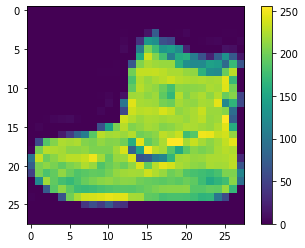

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

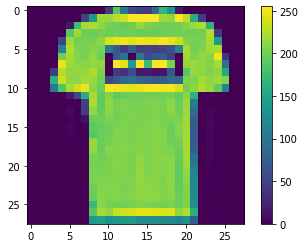

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()

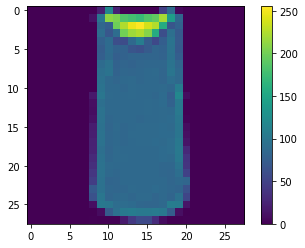

In [ ]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()

**Normalization of train and test set**

---



In [5]:
train_images = train_images/ 255.0
test_images = test_images /255.0

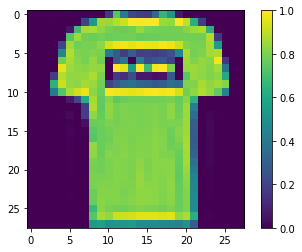

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()

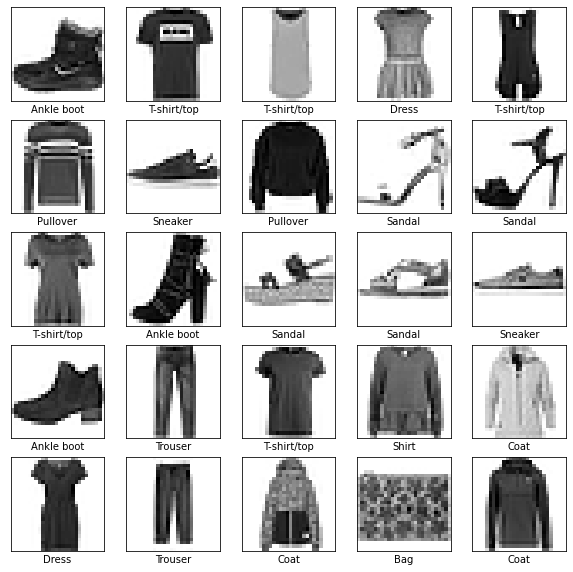

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

**Building Model**

---



In [6]:
model = keras.Sequential(
    [
     keras.layers.Flatten(input_shape=(28,28)), #input layer
     keras.layers.Dense(128, activation='relu'), #inner/hidden layers
     keras.layers.Dense(10,activation='softmax') #output layer
    ]
)

**Model Compilation**

---



In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Model Training**

---



In [8]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4983 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3742 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3344 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2955 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2686 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

**Accuracy testing on test data**

---



In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss and accuracy:', test_loss, test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3444 - accuracy: 0.8786
Test loss and accuracy: 0.3444332480430603 0.878600001335144


In [11]:
from sklearn.metrics import accuracy_score
pred_lebel = model.predict_classes(test_images)
z=accuracy_score(test_labels, pred_lebel)
print(z)

0.8786


**Prediction**

---



---



In [12]:
predictions = model.predict(test_images)

In [13]:
predictions[0]

array([1.8165886e-06, 2.5234606e-09, 7.8224536e-12, 1.0796505e-10,
       4.2731962e-10, 9.5864161e-05, 2.8725706e-08, 5.5255212e-02,
       7.7704153e-06, 9.4463933e-01], dtype=float32)

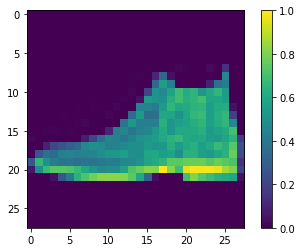

In [14]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

In [18]:
predictions[3]

array([1.4549556e-11, 1.0000000e+00, 1.4767174e-12, 1.2877327e-09,
       2.0851904e-10, 1.0226326e-16, 3.1259141e-11, 2.4468284e-26,
       4.6791548e-15, 1.7842999e-21], dtype=float32)

In [20]:
np.argmax(predictions[3])

1

In [21]:
test_labels[3]

1

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

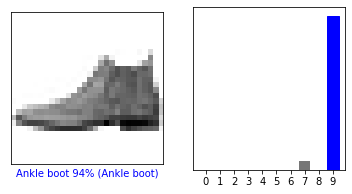

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)

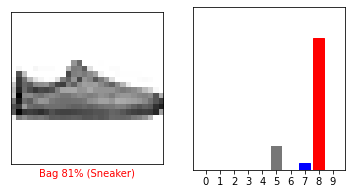

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

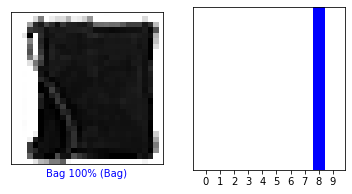

In [26]:
i = 53
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

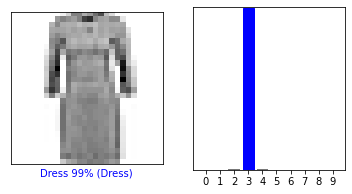

In [27]:
i = 176
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

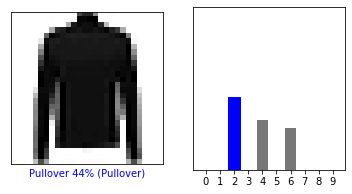

In [29]:
i = 255
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

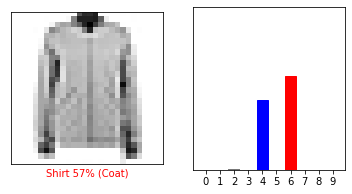

In [30]:
i = 313
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

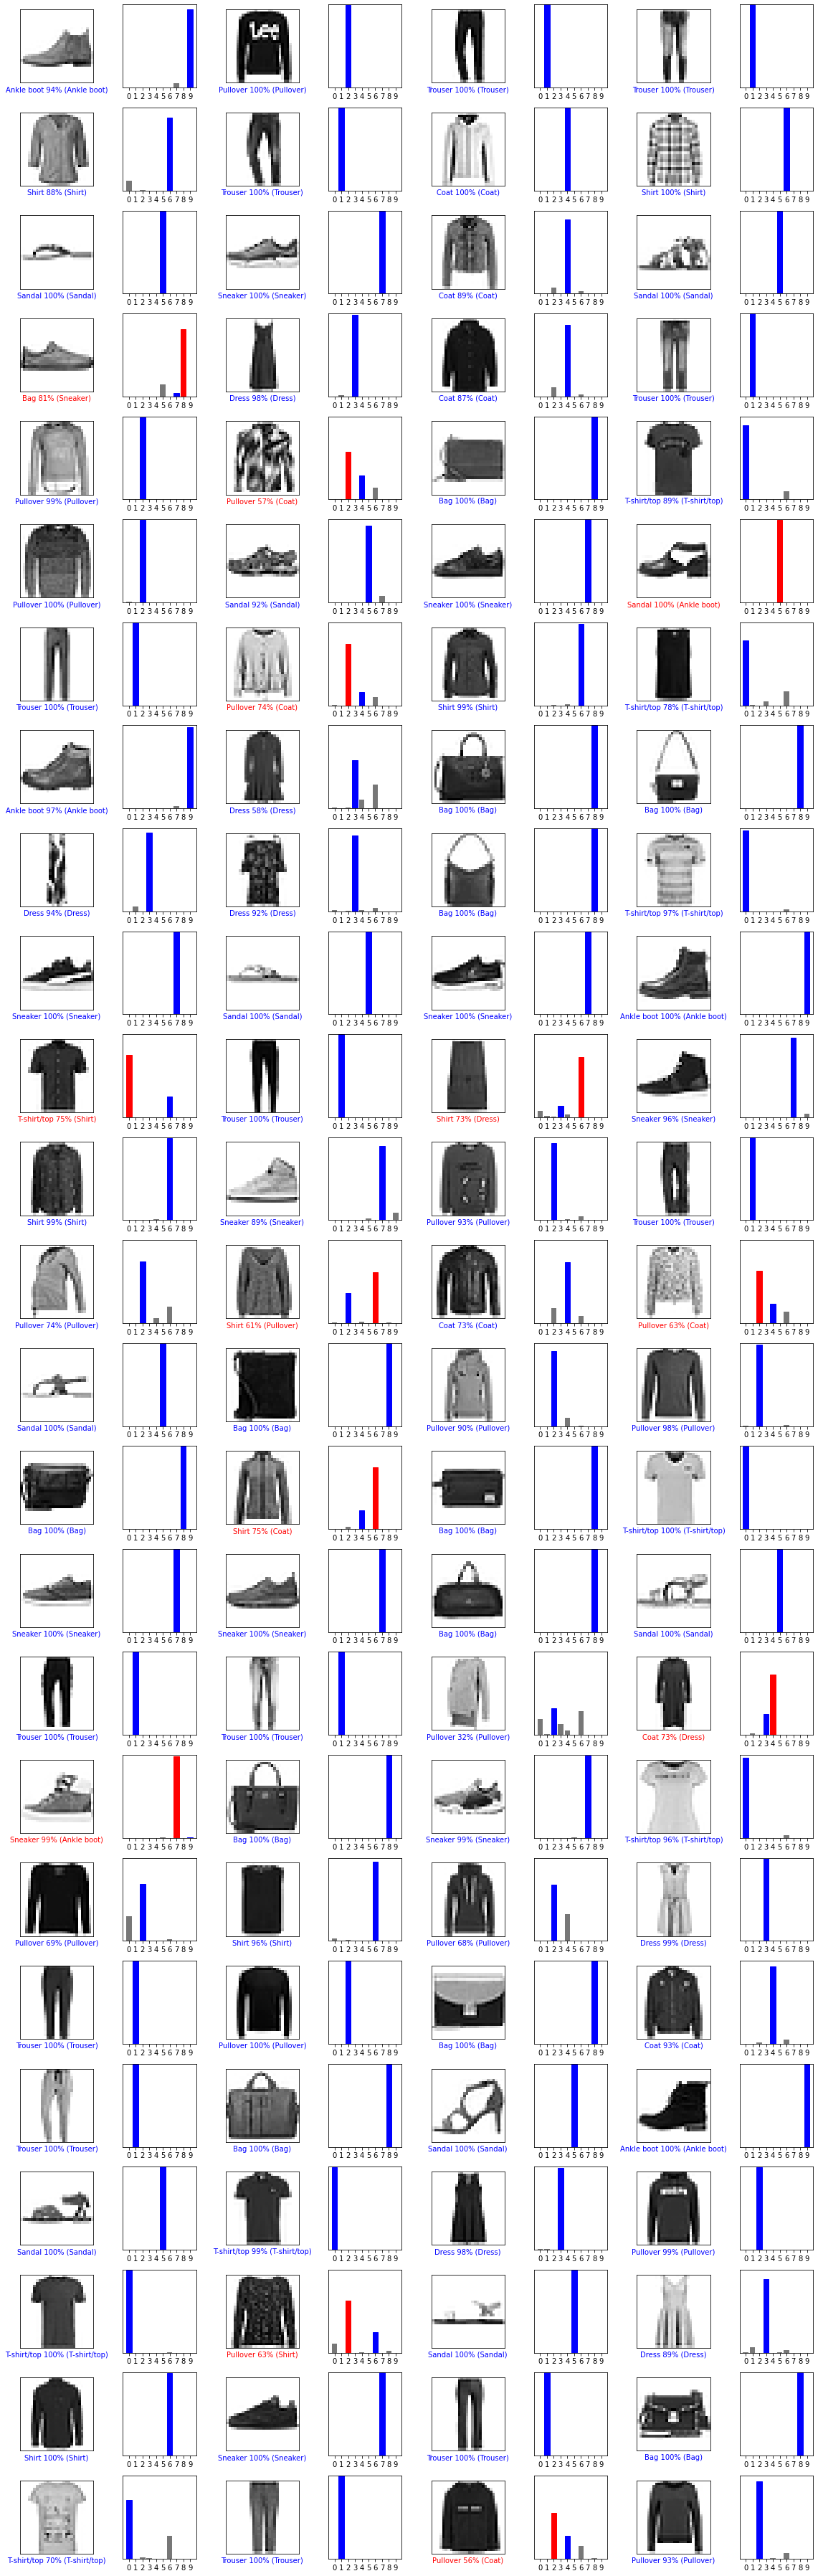

In [34]:
num_rows = 25
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**Predict a single picture**

---



---



In [47]:
img = test_images[9]
print(img.shape)

(28, 28)


In [48]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [49]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2477368e-08 1.2960650e-09 7.2743508e-12 4.5336061e-11 2.5371328e-12
  5.1532359e-05 2.6323024e-10 9.9993801e-01 1.5831350e-07 1.0375218e-05]]


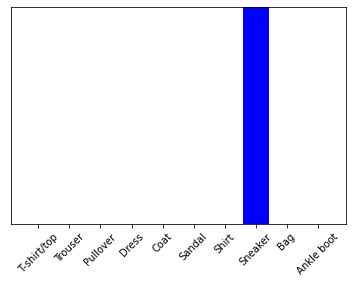

In [55]:
plot_value_array(9, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [56]:
np.argmax(predictions_single[0])

7